<a href="https://colab.research.google.com/github/adammoss/bnn_hmc/blob/main/results/Mirabest_VI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
import sys
import shutil
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
!nvidia-smi

Thu Aug 11 17:16:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install astro-datasets --upgrade
!pip install tensorflow_datasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for astro-datasets: filename=astro_datasets-0.0.9-py3-none-any.whl size=15986 sha256=fbd36645558ceefdabc48f8e9abdb3590d7431a69ecc2c6acb69d03c175bae7c
  Stored in directory: /root/.cache/pip/wheels/77/11/df/7eb516aa333b47883b39adabbe38508a09163be741b476dcda
Successfully built astro-datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
shutil.rmtree('bnn_hmc', ignore_errors=True)

In [5]:
!git clone https://github.com/adammoss/bnn_hmc

Cloning into 'bnn_hmc'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 209 (delta 132), reused 120 (delta 57), pack-reused 0
Receiving objects: 100% (209/209), 600.50 KiB | 15.80 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [6]:
# https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

!pip install --upgrade https://storage.googleapis.com/jax-releases/cuda111/jaxlib-0.1.65+cuda111-cp37-none-manylinux2010_x86_64.whl
!pip install jax==0.2.12
!pip install dm-haiku==0.0.5.dev0 optax==0.0.6 chex==0.0.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 189.4 MB 18 kB/s 
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.3.14+cuda11.cudnn805
    Uninstalling jaxlib-0.3.14+cuda11.cudnn805:
      Successfully uninstalled jaxlib-0.3.14+cuda11.cudnn805
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 590 kB 13.6 MB/s 
  Created wheel for jax: filename=jax-0.2.12-py3-none-any.whl size=682487 sha256=4da3698df6f567d9d97a0dcaa637b49896e9b1f9be141103b6c643375a3e79d3
  Stored in directory: /root/.cache/pip/wheels/f6/4d/e5/73eec5070b77f25664c67bd793d4eb97f41bbf9be7afafd15e
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [7]:
!python3 bnn_hmc/scripts/run_vi.py --seed=1 --weight_decay=5. --dir=runs/vi/mirabestc/lenet/ \
  --dataset_name=mirabest/confident --model_name=lenet \
  --init_step_size=1e-4 --num_epochs=200 --eval_freq=5 --batch_size=53 --patience 10\
  --save_freq=300 --optimizer=Adam \
  --vi_sigma_init=0.01 --temperature=1. --vi_ensemble_size=20 --train_split=train[:80%] --test_split=train[80%:]

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2022-08-11 17:16:49.303819: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "NOT_FOUND: Error executing an HTTP request: HTTP response code 404".
Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0% 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0% 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 100% 1/1 [00:00<00:00,  3.11 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 100% 1/1 [00:00<00:00,  3.11 url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...:   0% 0/1 [00

In [8]:
!python3 bnn_hmc/scripts/run_vi.py --seed=1 --weight_decay=5. --dir=runs/vi/mirabestc/lenet/ \
  --dataset_name=mirabest/confident --model_name=lenet \
  --init_step_size=1e-4 --num_epochs=200 --eval_freq=5 --batch_size=53 --patience 10\
  --save_freq=300 --optimizer=Adam \
  --vi_sigma_init=0.01 --temperature=1. --vi_ensemble_size=20 --eval_split=test

JAX sees the following devices: [GpuDevice(id=0, process_index=0)]
TF sees the following devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Continuing the run from the last saved checkpoint
bnn_hmc/scripts/run_vi.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vi_ensemble_predict_fn(net_apply, params, net_state, test_set))
{'accuracy': DeviceArray(0.8365385, dtype=float32), 'nll': 0.43177196, 'ece': 0.09760396698346505}


In [28]:
accuracies = []
nlls = []
eces = []
softmax = []
for i, root in enumerate(glob.glob('/content/runs/vi/mirabestc/lenet/*/')):
  data = np.load(root + '/test_set.npy')  
  softmax = np.squeeze(np.load(root + '/predictions.npy'))
  metrics = np.load(root + '/metrics.npy', allow_pickle=True)
  accuracies.append(metrics.item()['accuracy'])
  nlls.append(metrics.item()['nll'])
  eces.append(metrics.item()['ece'])
print('Accuracy', np.mean(accuracies), np.std(accuracies))
print('NLL', np.mean(nlls), np.std(nlls))
print('ECE', np.mean(eces), np.std(eces))

Accuracy 0.8365385 0.0
NLL 0.43177196 0.0
ECE 0.09760396698346505 0.0


In [26]:
# Why is this different to running average above?
accuracies = []
for s in softmax:
  accuracies.append(np.sum(np.argmax(s, axis=-1) == data) / len(s))
print('Accuracy', np.mean(accuracies), np.std(accuracies))

Accuracy 0.8192307692307692 0.03394108191292844


In [29]:
def uncertainty(softmax):
  # Per example softmax with shape(num_examples, num_classes)
  predictive_entropy = 0
  single_pass_entropy = 0
  for i in range(softmax.shape[1]):
    # Sum over classes
    predictive_entropy += -np.mean(softmax[:,i])*np.log(np.mean(softmax[:,i]))
    single_pass_entropy += -softmax[:,i]*np.log(softmax[:,i])
  single_pass_entropy = np.mean(single_pass_entropy)
  mutual_info = predictive_entropy - single_pass_entropy
  return predictive_entropy, single_pass_entropy, mutual_info

In [30]:
predictive_entropies = [] 
single_pass_entropies = []
mutual_infos = []
for i in range(softmax.shape[1]):
  predictive_entropy, single_pass_entropy, mutual_info = uncertainty(softmax[:,i,:])
  predictive_entropies.append(predictive_entropy)
  single_pass_entropies.append(single_pass_entropy)
  mutual_infos.append(mutual_info)
print('Predictive entropy:', np.mean(predictive_entropies), np.std(predictive_entropies))
print('Single pass entropy:', np.mean(single_pass_entropies), np.std(single_pass_entropies))
print('Mutual info:', np.mean(mutual_infos), np.std(mutual_infos))

Predictive entropy: 0.4061420932076334 0.2047528743144488
Single pass entropy: 0.37144372 0.18620953
Mutual info: 0.03469837613878413 0.027571671865331708


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


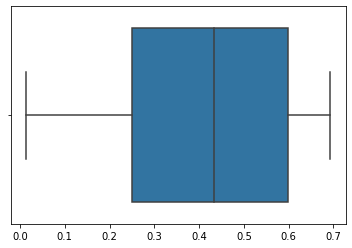

In [33]:
sns.boxplot(predictive_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


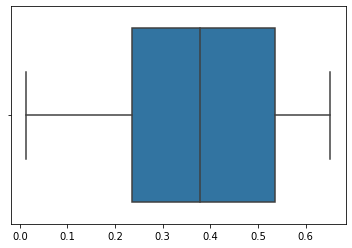

In [34]:
sns.boxplot(single_pass_entropies)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


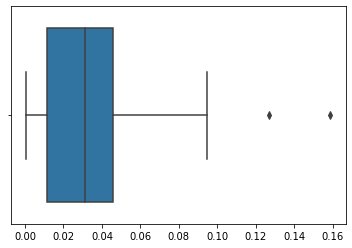

In [35]:
sns.boxplot(mutual_infos)
plt.show()